# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000,random_state=42)

In [6]:
np.shape(X_train)

(60000, 784)

In [7]:
X_train[:1]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [8]:
#reshape 784 to 28x28
images = X_train.reshape(X_train.shape[0],28,28) 

In [9]:
X_train.ndim

2

In [10]:
images.ndim

3

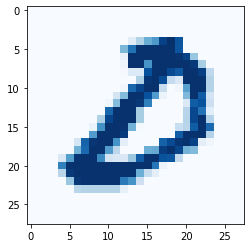

In [11]:
#insert number from 0 to 59999 (60k samples) to get 1 image
plt.imshow(images[59999], cmap='Blues')
plt.show()

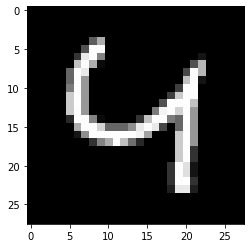

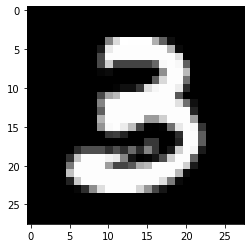

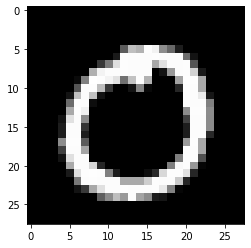

In [14]:
#start at image/array "start" and display "howmany" images
def show_images(images,start, howmany):
    for i in range(start, start+howmany):
        plt.figure(i)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.show()
show_images(images, 59900, 3)

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [15]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
#simple linear model
from sklearn import linear_model
sgd = linear_model.SGDClassifier(loss='log',max_iter=500, tol=1e-3)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
#Accuracy score
from sklearn.metrics import accuracy_score

#GNB
y_gnb = gnb.predict(X_train)
acc1=accuracy_score(y_train,y_gnb)

#SGD
y_sgd = sgd.predict(X_train)
acc2=accuracy_score(y_train,y_sgd)

#RFC
y_rfc = rfc.predict(X_train)
acc3=accuracy_score(y_train,y_rfc)

print("AccuracyGNB score is", acc1)
print("AccuracySGD score is", acc2)
print("AccuracyRFC score is", acc3)

AccuracyGNB score is 0.5571666666666667
AccuracySGD score is 0.8584
AccuracyRFC score is 0.8114166666666667


In [20]:
#Confusion matrices
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_gnb)

array([[5319,    9,   32,   20,    9,   13,  187,    2,  209,  120],
       [   2, 6327,   15,   28,    3,   12,   83,    2,  169,   84],
       [ 498,  149, 1913,  373,   19,   29, 1549,   20, 1365,  108],
       [ 363,  292,   56, 2186,    8,   14,  340,   47, 2093,  708],
       [ 162,   35,   49,   35,  821,   46,  601,   32, 1220, 2917],
       [ 635,  131,   31,  121,   21,  262,  312,   11, 3243,  609],
       [  49,   90,   30,    2,    4,   23, 5592,    0,  118,    7],
       [  25,   41,   10,   53,   42,    8,   21, 1803,  190, 4045],
       [  93,  719,   32,   45,   14,   34,  103,    9, 3583, 1224],
       [  34,   33,   14,   10,   27,    6,    4,   76,   94, 5624]],
      dtype=int64)

In [21]:
confusion_matrix(y_train, y_sgd)

array([[5769,    1,    5,   14,    4,    3,   39,    1,   79,    5],
       [   1, 6563,   18,   23,    2,   12,    7,    3,   87,    9],
       [  68,  159, 4659,  409,   41,   22,  102,   44,  500,   19],
       [  26,   18,   39, 5661,    3,   35,   35,   17,  254,   19],
       [  14,   19,   76,  159, 5131,   23,   74,   43,  283,   96],
       [  57,   26,   15,  416,   15, 3205,  170,   11, 1409,   52],
       [  26,   21,   14,   14,   14,   39, 5671,    3,  111,    2],
       [  21,   37,   44,  138,   30,   16,    6, 5485,  203,  258],
       [  32,   88,   19,  279,   12,   31,   18,    4, 5359,   14],
       [  26,   22,   17,  266,  134,   63,    2,  284, 1107, 4001]],
      dtype=int64)

In [22]:
confusion_matrix(y_train, y_rfc)

array([[5688,    4,   22,   35,    3,    4,   55,   21,   86,    2],
       [   1, 6591,   46,   13,    5,   10,   15,   23,   13,    8],
       [ 115,  375, 4804,  120,   75,    8,  179,  208,  112,   27],
       [ 137,  302,  176, 4964,   28,   45,   47,  145,  119,  144],
       [  36,   67,   38,    8, 4801,    4,  191,  119,   82,  572],
       [ 348,  316,   42, 1419,  126, 2298,  185,  129,  192,  321],
       [ 141,  154,  119,   32,  129,   33, 5211,   34,   60,    2],
       [  60,  231,  140,    3,   62,    0,    2, 5508,   41,  191],
       [  38,  613,   85,  307,   66,   38,   97,   48, 4264,  300],
       [  66,   92,   58,  100,  344,    9,   39,  570,   88, 4556]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [23]:
#GNB Test accuracy
y_testgnb = gnb.predict(X_test)
acc4=accuracy_score(y_test,y_testgnb)

#SGD Test accuracy
y_testsgd = sgd.predict(X_test)
acc5=accuracy_score(y_test,y_testsgd)

#RFC Test accuracy
y_testrfc = rfc.predict(X_test)
acc6=accuracy_score(y_test,y_testrfc)

print("TestGNB score is", acc4)
print("TestSGD score is", acc5)
print("TestRFC score is", acc6)

TestGNB score is 0.5604
TestSGD score is 0.8442
TestRFC score is 0.8128


In [28]:
#F1-Score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_testgnb, average='micro'))
print(f1_score(y_test, y_testsgd, average='micro'))
print(f1_score(y_test, y_testrfc, average='micro'))

0.5604
0.8442
0.8128


In [40]:
#ROC
from sklearn.metrics import roc_auc_score,  roc_curve, auc

y_five = y_test=='5' 
gnb_five = y_testgnb.astype(int)==5 
sgd_five = y_testsgd.astype(int)==5
rfc_five = y_testrfc.astype(int)==5

gnb_fpr, gnb_tpr, _ = roc_curve(y_five, gnb_five)
sgd_fpr, sgd_tpr, _ = roc_curve(y_five, sgd_five)
rfc_fpr, rfc_tpr, _ = roc_curve(y_five, rfc_five)

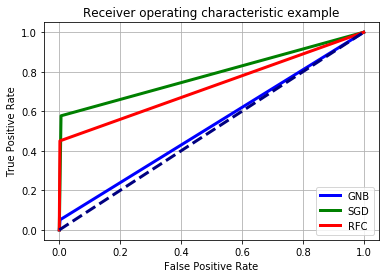

In [50]:
plt.plot(gnb_fpr, gnb_tpr, color='blue',
         lw='3', label='GNB')
plt.plot(sgd_fpr, sgd_tpr, color='green',
         lw='3', label='SGD')
plt.plot(rfc_fpr, rfc_tpr, color='red',
         lw='3', label='RFC')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid()
plt.show()